Whats the initial projectile velocity(meters/s): 50
Whats the height above the ground(meters): 32
Whats the angle of the projectile(degrees): 41


'The Two Hardcoded Equations'

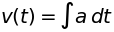

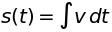

'The Four Derived Equations, g = -9.8(y-direction)'

Intial Velocity: 50 meters/sec
Angle of Projectile: 41 degrees
Height above the ground: 32 meters
Time for max height: 3.34724 seconds
Max Height: 86.8997 meters
Range: 285.223 meters


Text(0, 50, 'Height: 86.900m \nTime for max height: 3.3472s')

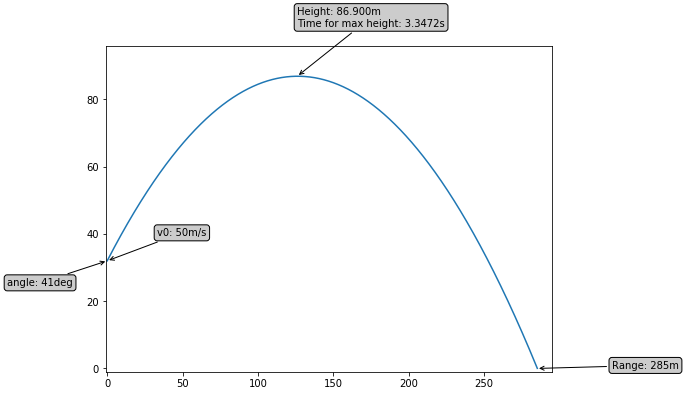

In [2]:
import sympy as sp
import numpy as np
import matplotlib.ticker as tck
import matplotlib.pyplot as plt
%matplotlib inline 
sp.init_printing(use_latex=True)

def printeq():
    display('The Two Hardcoded Equations')
    v = sp.Function('v')
    s = sp.Function('s')
    a,t = sp.symbols('a,t')
    funcv = sp.Eq(v(t),sp.Integral(a,t))
    display(funcv)
    v = sp.Symbol('v')
    funcs = sp.Eq(s(t),sp.Integral(v,t))
    display(funcs)

    
def get_value():
    initial_velocity = int(input('Whats the initial projectile velocity(meters/s): '))
    initial_y = int(input('Whats the height above the ground(meters): '))
    intial_angle = int(input('Whats the angle of the projectile(degrees): '))
    intial_angle = (intial_angle*sp.pi)/180
    return initial_y,initial_velocity,intial_angle


initial_x = 0
initial_y,initial_velocity,intial_angle = get_value()
printeq()

v = sp.Function('v')
s = sp.Function('s')
theta = sp.symbols("\\theta")
C1,v0,s0 = sp.symbols('C1,v0,s0')
a,t,x,y = sp.symbols('a,t,x,y')
g = -9.8


func = sp.Eq(sp.Derivative(v(t),t),a)
#display(func)

v1 = (sp.dsolve(func,v(t))).subs(C1,v0)
#display(v1)

s1 = sp.dsolve(sp.Derivative(s(t),t)-sp.solve(v1,v(t))[0],s(t)).subs(C1,s0)
display(s1)

vx = v1.subs(v0,v0*sp.cos(theta)).subs(a,0).subs(v(t),v(x))
vy = v1.subs(v0,v0*sp.sin(theta)).subs(a,g).subs(v(t),v(y))

sx = s1.subs(v0,v0*sp.cos(theta)).subs(a,0).subs(s0,initial_x).subs(s(t),s(x))
sy = s1.subs(v0,v0*sp.sin(theta)).subs(a,g).subs(s0,initial_y).subs(s(t),s(y))

display('The Four Derived Equations, g = -9.8(y-direction)')
display(vx,vy)
display(sx,sy)
print('Intial Velocity:',initial_velocity,'meters/sec')
print('Angle of Projectile:',intial_angle*180/sp.pi,'degrees')
print('Height above the ground:',initial_y,'meters')

t_sx = sp.solve(sx,t)
#display(t_sx)

projectile_eq = sy.subs(t,t_sx[0]).subs(theta,intial_angle).subs(v0,initial_velocity)
#display(projectile_eq)

#display(sp.solve(projectile_eq,s(y)))

final_eqinsert = sp.solve(sp.solve(projectile_eq,s(y))[0],s(x))
#display(final_eqinsert)

time_max_height = ((sp.solve(sp.Eq(sp.solve(vy,v(y))[0],0),t)[0]).subs(theta,intial_angle).subs(v0,initial_velocity)).evalf(6)

print('Time for max height:',time_max_height,'seconds')

max_height = (((sp.solve(sy,s(y))[0]).subs(theta,intial_angle).subs(v0,initial_velocity)).subs(t,time_max_height)).evalf(6)
print('Max Height:',max_height,'meters')
print('Range:',final_eqinsert[1].evalf(6),'meters')




range_x = np.arange(initial_x,final_eqinsert[1],0.1)
range_y = []
def ploting(equation,range_x):
    for i in range_x:
        range_y.append(equation.subs(s(x),i))

ploting(sp.solve(projectile_eq,s(y))[0],range_x)

range_ = int(final_eqinsert[1])
range_maxheight = ((sp.solve(sx,s(x))[0]).subs(t,time_max_height).subs(v0,initial_velocity).subs(theta,intial_angle)).evalf()
#display(range_maxheight)

fig = plt.figure(1,figsize=(8,6))
ax = fig.add_subplot(111, autoscale_on=False,xlim=(-1,range_+10), ylim=(-1,int(max_height)+10))

line = ax.plot(range_x,range_y)
#plt.show()

ax.annotate('angle: '+str(intial_angle*180/sp.pi)+'deg', xy=(initial_x,initial_y), xycoords='data',
                xytext=(-100,-25), textcoords='offset points',
                bbox=dict(boxstyle="round", fc='0.8'),
                arrowprops=dict(arrowstyle="->")#,
                                #connectionstyle="angle,angleA=0,angleB=0,rad=10"),
                )

ax.annotate('v0: '+str(initial_velocity)+'m/s', xy=(int(initial_x),int(initial_y)),  xycoords='data',
                xytext=(50,25), textcoords='offset points',
                bbox=dict(boxstyle="round", fc='0.8'),
                arrowprops=dict(arrowstyle="->")
           )

ax.annotate('Range: '+str(range_)+'m', xy=(range_,0),  xycoords='data',
                xytext=(75,0), textcoords='offset points',
                bbox=dict(boxstyle="round", fc='0.8'),
                arrowprops=dict(arrowstyle="->")                
           )

ax.annotate('Height: '+str(max_height.evalf(5))+'m \n'+'Time for max height: '+str(time_max_height.evalf(5))+'s', xy=(int(range_maxheight),max_height),  xycoords='data',
                xytext=(0,50), textcoords='offset points',
                bbox=dict(boxstyle="round", fc='0.8'),
                arrowprops=dict(arrowstyle="->")                
           )

#Caution: too high a initial velocity will result in longer range resulting in the plot to take longer to project